In [2]:
#import packages

from __future__ import print_function

import cobra
from cobra import Model, Reaction, Metabolite
import os
from os.path import join
#Open Model. Model source: http://bigg.ucsd.edu/static/models/iJO1366.xml

data_dir = '/Users/asd/Documents/iGEM/metabolic_model_tests'

model=cobra.io.load_json_model(join(data_dir, "iJO1366.json"))

In [8]:
#find reacions
hdca_c=model.metabolites.get_by_id('hdca_c')
hdca_c_reactions=list(hdca_c.reactions)

hdca_p=model.metabolites.get_by_id('hdca_p')
hdca_p_reactions=list(hdca_p.reactions)



In [3]:
#Glucose growth

models_ratio_values={}
for x in range(1,20):
    glucose_model= model
    EX_hdca_e= glucose_model.reactions.get_by_id('EX_hdca_e')
    EX_hdca_e.lower_bound=-0
    EX_hdca_e.upper_bound=1000.0

    EX_glc__D_e= glucose_model.reactions.get_by_id('EX_glc__D_e')
    EX_glc__D_e.lower_bound=-x
    EX_glc__D_e.upper_bound=0

    WT_glucose= glucose_model.optimize()

    #Palmitic growth


    palmitic_model= model
    EX_hdca_e= palmitic_model.reactions.get_by_id('EX_hdca_e')
    EX_hdca_e.lower_bound=-x
    EX_hdca_e.upper_bound=0

    EX_glc__D_e= palmitic_model.reactions.get_by_id('EX_glc__D_e')
    EX_glc__D_e.lower_bound=-0
    EX_glc__D_e.upper_bound=0

    WT_palmitic=palmitic_model.optimize()
    o=(WT_palmitic.objective_value/WT_glucose.objective_value)
    models_ratio_values.update({x:o})

with glucose_model:
    glucose_model.genes.b2344.knock_out()
    FadD_KO_glucose=glucose_model.optimize()
    
print( models_ratio_values)

{1: 2.659572485026595, 2: 2.540102640522383, 3: 2.5039233194233406, 4: 2.486447363021407, 5: 2.476150233386924, 6: 2.469362242711584, 7: 2.464550737037012, 8: 2.460962171645084, 9: 2.4581828669476296, 10: 2.4559668158936967, 11: 2.454158548816703, 12: 2.4526549923596708, 13: 2.451385111504923, 14: 2.450298359029357, 15: 2.449357785953894, 16: 2.4485357569437807, 17: 2.447811189691983, 18: 2.4471677212577343, 19: 2.446592457493749}


cobra/util/solver.py:404 UserWarning: solver status is 'infeasible'


In [4]:

with palmitic_model:
    palmitic_model.genes.b2344.knock_out()
    FadD_KO_palmitic=palmitic_model.optimize()


In [5]:

    
print('WT_glucose:',WT_glucose.objective_value,
    '\n FadD_KO_glucose:',FadD_KO_glucose.objective_value,
    '\n WT_palmitic:',WT_palmitic.objective_value,
    '\nFadD_KO_palmitic :',FadD_KO_palmitic.objective_value,)



WT_glucose: 1.87826504283 
 FadD_KO_glucose: 0.0 
 WT_palmitic: 4.59534908695 
FadD_KO_palmitic : 0.0


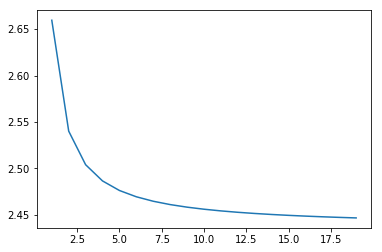

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
lists = models_ratio_values.items() # sorted by key, return a list of tuples
x, y = zip(*lists)
plt.plot(x,y)


#lists_2 = sorted(glucose_model_values.items()) # sorted by key, return a list of tuples
#z,q = zip(*lists_2)
#plt.plot(z,q)


plt.show()

In [7]:
hdca_c=model.metabolites.get_by_id('hdca_c')
hdca_c_reactions=list(hdca_c.reactions)

hdca_p=model.metabolites.get_by_id('hdca_p')
hdca_p_reactions=list(hdca_p.reactions)


#for x in hdca_c_reactions:
    #print(x.reaction,x.gene_reaction_rule)
    
print('>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<')
    
#for y in hdca_p_reactions:
    #print(y.reaction,y.gene_reaction_rule)
    
    
    

>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<
